# Cohot Analysis

#### Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time

In [1]:
import pandas as pd

data = pd.read_csv("cohorts.csv")
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [18]:
with open('cohort.txt','r') as file:
    contents = file.read()
print(contents)

Cohort Analysis is a method used in analytics and business intelligence to group customers or users into cohorts based on shared characteristics or experiences within a defined time-span. These cohorts are then tracked over time to observe changes in behavior, usage, or other key metrics.

The provided dataset contains user interaction data, including metrics such as the number of new and returning users, and their engagement durations on Day 1 and Day 7. The data is structured with dates, allowing for time-series analysis. Key columns in the dataset are:

Date: The specific dates of user interactions.
New Users: The count of new users for each date.
Returning Users: The count of users returning on each date.
Duration Day 1: The average duration (possibly in minutes or seconds) of user interaction on their first day.
Duration Day 7: The average duration of user interaction on their seventh day.

Our task is to:

-Identify trends in the acquisition of new users and the retention of retu

In [4]:
missing_values = data.isnull().sum()
missing_values

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

In [7]:
data_types = data.dtypes
data_types

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

##### The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format:

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Date'].head()

0   2023-10-25
1   2023-10-26
2   2023-10-27
3   2023-10-28
4   2023-10-29
Name: Date, dtype: datetime64[ns]

In [14]:
data.describe()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
count,30,30.000000,30.000000,30.000000,30.000000
mean,2023-11-08 12:00:00,3418.166667,1352.866667,208.259594,136.037157
min,2023-10-25 00:00:00,1929.000000,784.000000,59.047619,0.000000
25%,2023-11-01 06:00:00,3069.000000,1131.500000,182.974287,68.488971
50%,2023-11-08 12:00:00,3514.500000,1388.000000,206.356554,146.381667
75%,2023-11-15 18:00:00,3829.500000,1543.750000,230.671046,220.021875
max,2023-11-23 00:00:00,4790.000000,1766.000000,445.872340,304.350000
std,NaN,677.407486,246.793189,64.730830,96.624319


##### The descriptive statistics provide the following insights:

###### New Users: The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.
###### Returning Users: On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.
###### Duration Day 1: The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
###### Duration Day 7: The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
melted_data = data.melt(id_vars='Date', value_vars=['New users', 'Returning users'],
                        var_name='User Type', value_name='Number of Users')
melted_data.head()

,Date,User Type,Number of Users
0,2023-10-25,New users,3461
1,2023-10-26,New users,3777
2,2023-10-27,New users,3100
3,2023-10-28,New users,2293
4,2023-10-29,New users,2678


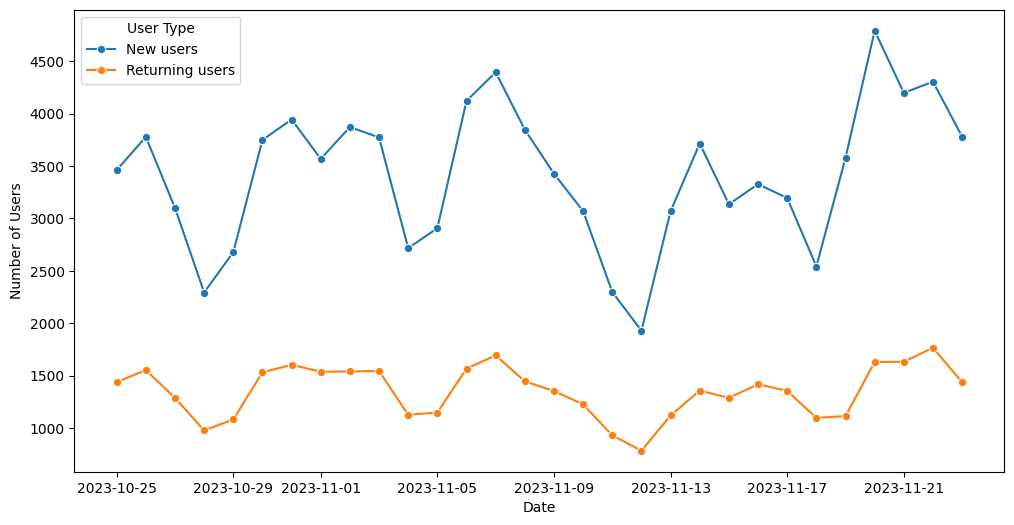

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_data, x='Date', y='Number of Users', hue='User Type',marker='o')
plt.show()

###### Your product or platform is attracting many new users, but the returning user count is relatively low, which could indicate:
###### (i) Users are trying the product but not sticking around.
###### (ii) or, there’s a high focus on acquisition but less on retention.

In [51]:
melted_data = data.melt(id_vars='Date',
                        value_vars=['Duration Day 1', 'Duration Day 7'],
                        var_name='Day',
                        value_name='Duration')

melted_data.head()

,Date,Day,Duration
0,2023-10-25,Duration Day 1,202.156977
1,2023-10-26,Duration Day 1,228.631944
2,2023-10-27,Duration Day 1,227.185841
3,2023-10-28,Duration Day 1,261.079545
4,2023-10-29,Duration Day 1,182.567568


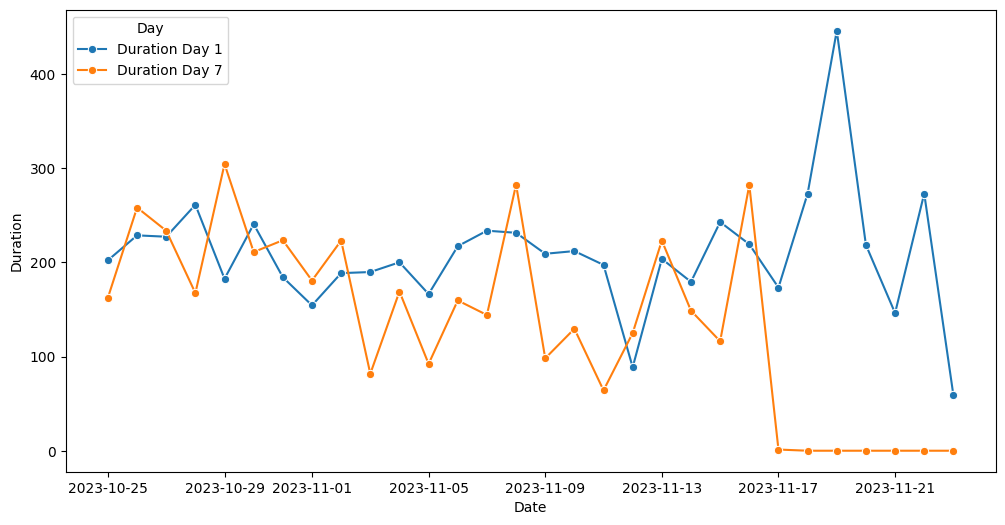

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_data, x='Date', y='Duration', hue='Day', marker='o')
plt.show()

###### Day 1 activity is consistent, suggesting onboarding or discovery is working fine.
###### Day 7 drop to zero could indicate a retention problem, bug, or recent onboarding cohorts who haven’t reached their Day 7 mark yet (depending on how data is logged).
##### Worth investigating what happened around November 16–17 — a campaign? new feature? — as it caused a spike in Day 1 duration and a crash in Day 7.

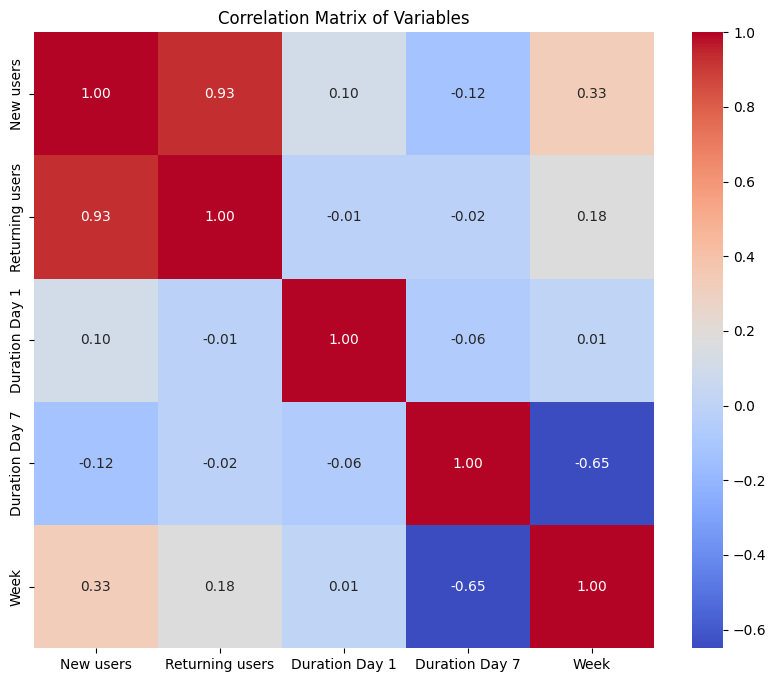

In [72]:
correlation_matrix = data.iloc[:,1:].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

#### Here, the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

### Cohort Analysis

#### For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7. Let’s start by grouping the data by week and calculating the necessary averages:

In [59]:
data['Week'] = data['Date'].dt.isocalendar().week
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7,Week
0,2023-10-25,3461,1437,202.156977,162.523809,43
1,2023-10-26,3777,1554,228.631944,258.147059,43
2,2023-10-27,3100,1288,227.185841,233.550000,43
3,2023-10-28,2293,978,261.079545,167.357143,43
4,2023-10-29,2678,1082,182.567568,304.350000,43


#### Weekely averages grouped for new users 

In [60]:
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

weekly_averages

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


In [87]:
melted_users = weekly_averages.melt(
    id_vars='Week',
    value_vars=['New users','Returning users'],
    var_name='Users',
    value_name = 'Number of Users',
)

melted_Duration=weekly_averages.melt(
    id_vars='Week',
    value_vars=['Duration Day 1','Duration Day 7'],
    var_name='Day',
    value_name='Duration'
)
melted_users['Week']=melted_users['Week'].astype(int)
melted_users.head(),melted_Duration.head()

(   Week      Users  Number of Users
 0    43  New users      3061.800000
 1    44  New users      3503.571429
 2    45  New users      3297.571429
 3    46  New users      3222.428571
 4    47  New users      4267.750000,
    Week             Day    Duration
 0    43  Duration Day 1  220.324375
 1    44  Duration Day 1  189.088881
 2    45  Duration Day 1  198.426524
 3    46  Duration Day 1  248.123542
 4    47  Duration Day 1  174.173330)

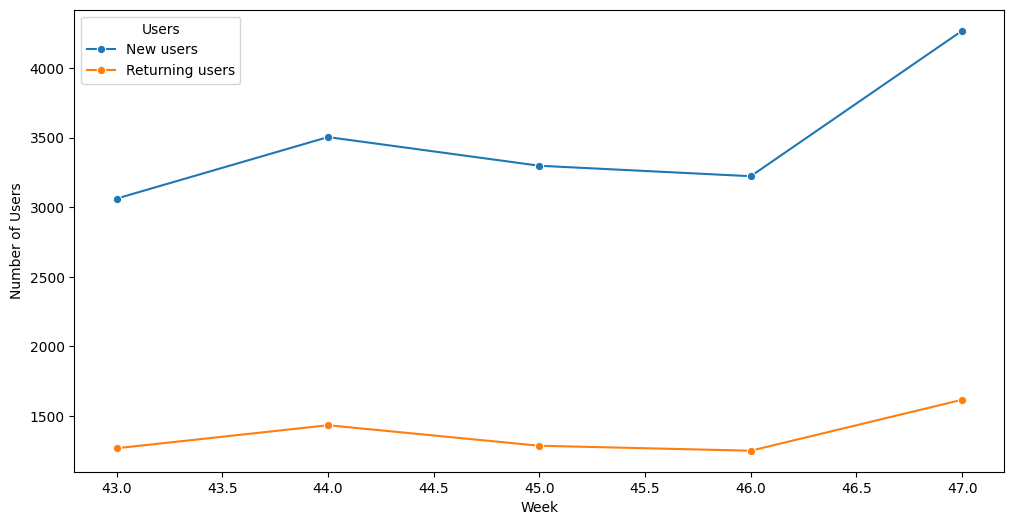

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data=melted_users,x='Week',y='Number of Users',marker='o',hue='Users')
plt.show()

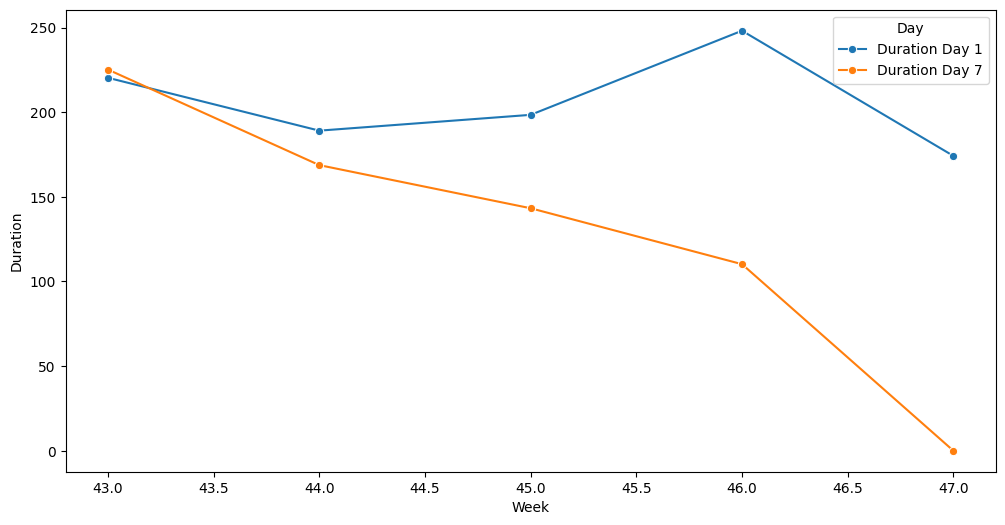

In [91]:
plt.figure(figsize=(12,6))
sns.lineplot(data=melted_Duration,x='Week',y='Duration',hue='Day',marker='o')
plt.show()

#### Creating a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:

##### Average number of new users.
##### Average number of returning users.
##### Average duration on Day 1.
##### Average duration on Day 7.

In [95]:
cohort_matrix = weekly_averages.set_index('Week')
weekly_averages

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


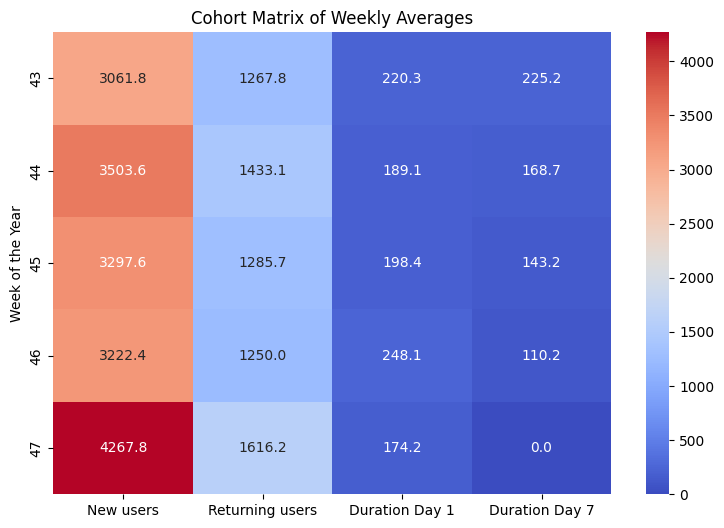

In [96]:
plt.figure(figsize=(9,6 ))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()